<a href="https://colab.research.google.com/github/KeshavAman/Bank-Loan-Default-Prediction/blob/main/Bank_Loan_Default_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import plotting

**Importing dataset**

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/KeshavAman/file/main/Default_Fin.csv")
dataset.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [3]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,10000.0,5000.500000,2886.895680,1.00,2500.75,5000.50,7500.25,10000.00
Employed,10000.0,0.705600,0.455795,0.00,0.00,1.00,1.00,1.00
Bank Balance,10000.0,10024.498524,5804.579486,0.00,5780.79,9883.62,13995.66,31851.84
Annual Salary,10000.0,402203.782224,160039.674988,9263.64,256085.52,414631.74,525692.76,882650.76
Defaulted?,10000.0,0.033300,0.179428,0.00,0.00,0.00,0.00,1.00


In [4]:
print("Rows and columns :",dataset.shape)

Rows and columns : (10000, 5)


In [5]:
dataset.isnull().sum

<bound method DataFrame.sum of       Index  Employed  Bank Balance  Annual Salary  Defaulted?
0     False     False         False          False       False
1     False     False         False          False       False
2     False     False         False          False       False
3     False     False         False          False       False
4     False     False         False          False       False
...     ...       ...           ...            ...         ...
9995  False     False         False          False       False
9996  False     False         False          False       False
9997  False     False         False          False       False
9998  False     False         False          False       False
9999  False     False         False          False       False

[10000 rows x 5 columns]>

**Checking and droping the null values**

In [6]:
dataset = dataset.dropna(axis = 1)
dataset.shape

(10000, 5)

**Value count**

In [7]:
dataset['Defaulted?'].value_counts()

0    9667
1     333
Name: Defaulted?, dtype: int64

**Visualize the value count**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


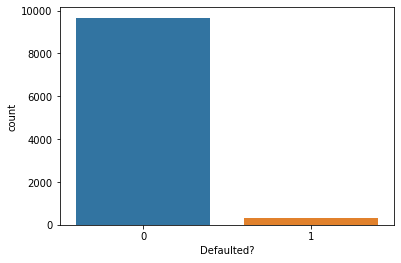

In [8]:
sns.countplot(dataset['Defaulted?'], label = 'count') 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


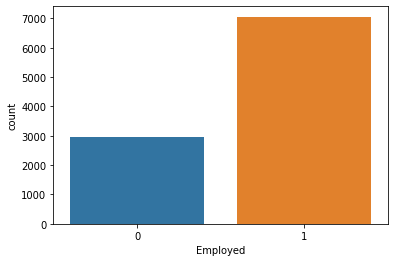

In [9]:
sns.countplot(dataset['Employed'], label = 'count')

**Pairplot**

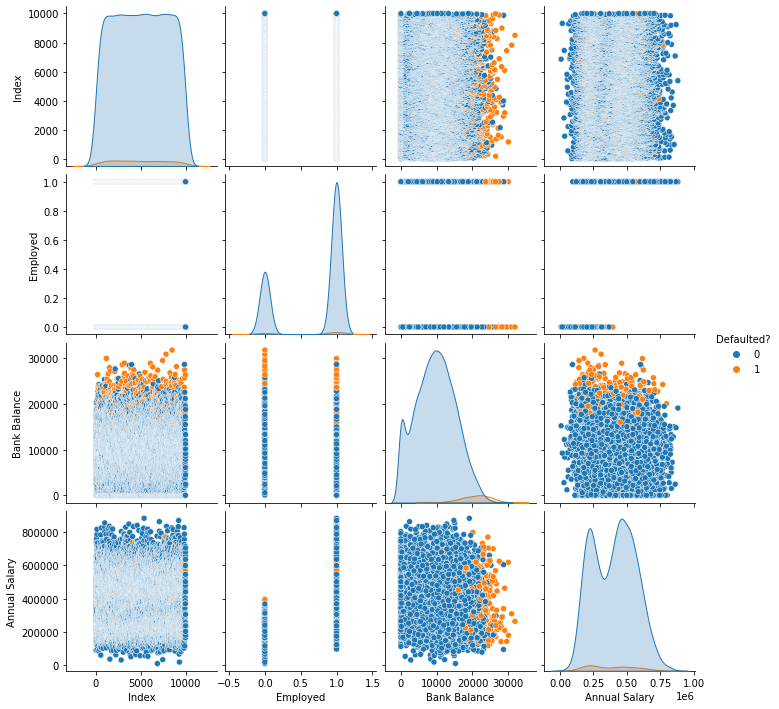

In [10]:
sns.pairplot(dataset, hue = 'Defaulted?')

**Heatmap**

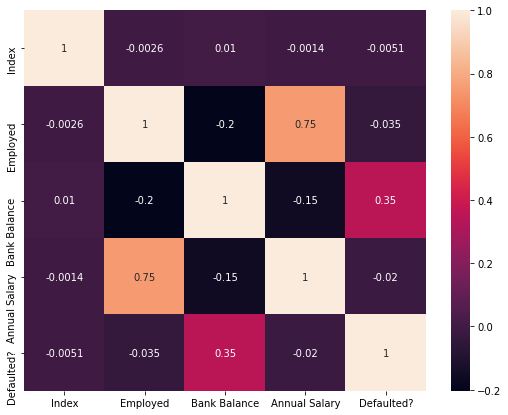

In [11]:
plt.figure(figsize=(9,7))
sns.heatmap(dataset.corr(), annot = True)

**Displot**

<Figure size 720x576 with 0 Axes>

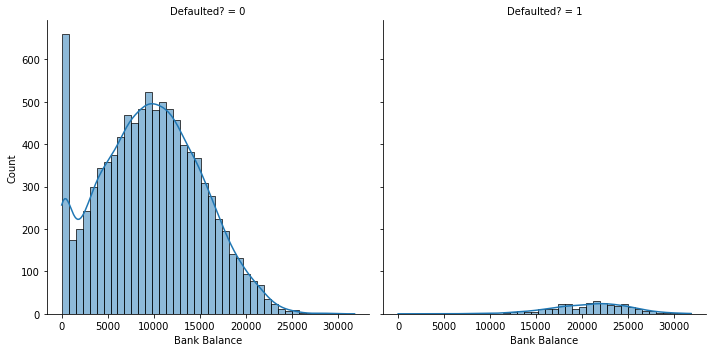

In [12]:
plt.figure(figsize=(10,8))
sns.displot(dataset, x='Bank Balance', col = 'Defaulted?', kde = True)

<Figure size 720x576 with 0 Axes>

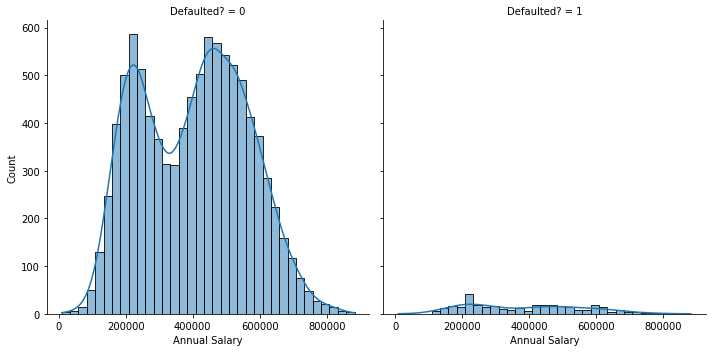

In [13]:
plt.figure(figsize=(10,8))
sns.displot(dataset, x = 'Annual Salary', col = 'Defaulted?', kde = True)

**Andrews Curves**

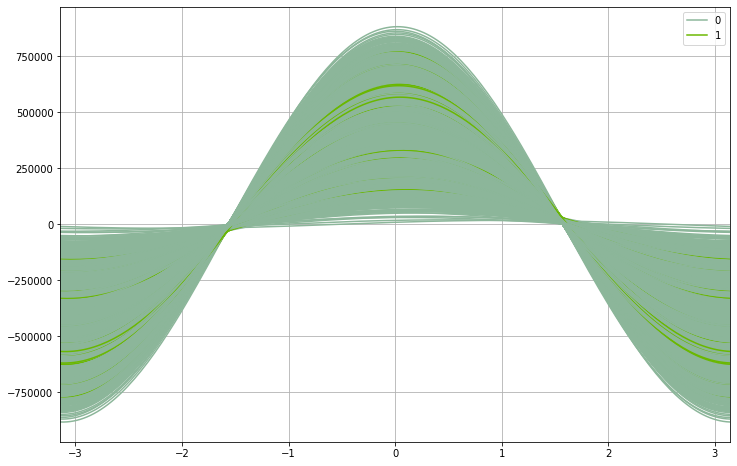

In [14]:
fig = plt.figure(figsize = (12,8))
plotting.andrews_curves(dataset.drop('Index', axis =1),'Defaulted?')
plt.show()

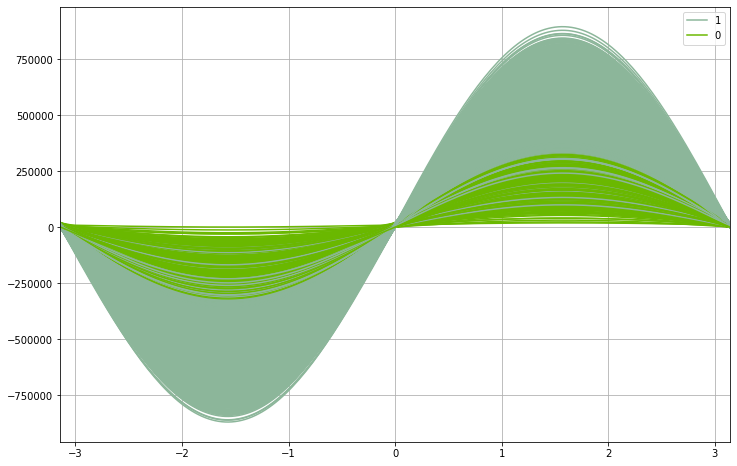

In [15]:
fig = plt.figure(figsize = (12,8))
plotting.andrews_curves(dataset.drop('Index', axis =1 ),'Employed')
plt.show()

**Kdeplot**

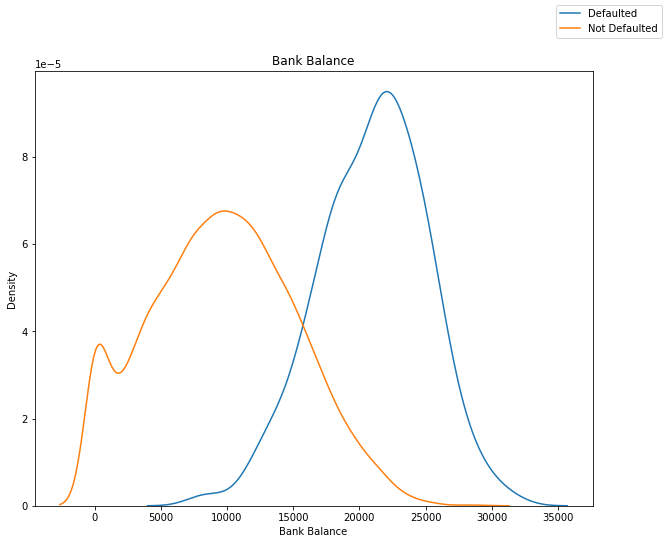

In [17]:
fig = plt.figure(figsize=(10,8))

sns.kdeplot(dataset[dataset['Defaulted?']==1]['Bank Balance'])
sns.kdeplot(dataset[dataset['Defaulted?']==0]['Bank Balance'])
fig.legend(labels=['Defaulted','Not Defaulted'])
plt.title('Bank Balance')
plt.show()

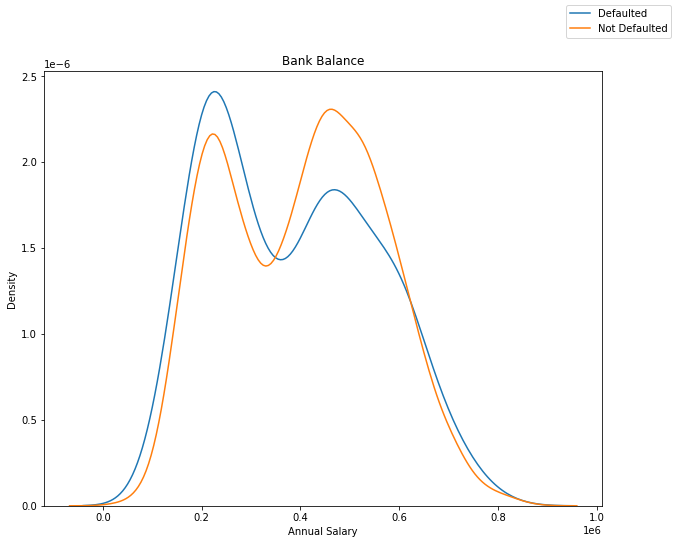

In [18]:
fig = plt.figure(figsize=(10,8))

sns.kdeplot(dataset[dataset['Defaulted?']==1]['Annual Salary'])
sns.kdeplot(dataset[dataset['Defaulted?']==0]['Annual Salary'])
fig.legend(labels=['Defaulted','Not Defaulted'])
plt.title('Bank Balance')
plt.show()

**Preprocessing of dataset**

In [20]:
from sklearn.preprocessing import MinMaxScaler

feature_cols = ['Employed', 'Bank Balance', 'Annual Salary']
sc = MinMaxScaler()
dataset[feature_cols] = sc.fit_transform(dataset[feature_cols])

**Splitting of dataset**

In [22]:
from sklearn.model_selection import train_test_split

X = dataset[feature_cols]
y = dataset['Defaulted?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =4,stratify=y)

**Dimensions**

In [25]:
print('X_train shape : ',X_train.shape)
print('X_test shape : ',X_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

X_train shape :  (8000, 3)
X_test shape :  (2000, 3)
y_train shape :  (8000,)
y_test shape :  (2000,)


**Using KNN**

In [27]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print('Accuracy Score :',accuracy_score(y_test, y_pred)*100)
print('Precision Score :',precision_score(y_test, y_pred)*100)
print('Recall Score :',recall_score(y_test, y_pred)*100)
print('F1 Score :',f1_score(y_test, y_pred)*100)
print('Confusion Matrix :',confusion_matrix(y_test, y_pred), sep='\n')

Accuracy Score : 97.05
Precision Score : 59.523809523809526
Recall Score : 37.3134328358209
F1 Score : 45.87155963302752
Confusion Matrix :
[[1916   17]
 [  42   25]]


**Using Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print('Accuracy Score :',accuracy_score(y_test, y_pred)*100)
print('Precision Score :',precision_score(y_test, y_pred)*100)
print('Recall Score :',recall_score(y_test, y_pred)*100)
print('F1 Score :',f1_score(y_test, y_pred)*100)
print('Confusion Matrix :',confusion_matrix(y_test, y_pred), sep='\n')

Accuracy Score : 97.39999999999999
Precision Score : 89.47368421052632
Recall Score : 25.37313432835821
F1 Score : 39.53488372093024
Confusion Matrix :
[[1931    2]
 [  50   17]]


**Using Random Forest Classifier**

In [34]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators = 100)
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print('Accuracy Score :',accuracy_score(y_test, y_pred)*100)
print('Precision Score :',precision_score(y_test, y_pred)*100)
print('Recall Score :',recall_score(y_test, y_pred)*100)
print('F1 Score :',f1_score(y_test, y_pred)*100)
print('Confusion Matrix :',confusion_matrix(y_test, y_pred), sep='\n')

Accuracy Score : 97.2
Precision Score : 62.7906976744186
Recall Score : 40.298507462686565
F1 Score : 49.090909090909086
Confusion Matrix :
[[1917   16]
 [  40   27]]


**Using Naive Bayes ( GaussianNB )**

In [38]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train,y_train)
y_pred = NB.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print('Accuracy Score :',accuracy_score(y_test, y_pred)*100)
print('Precision Score :',precision_score(y_test, y_pred)*100)
print('Recall Score :',recall_score(y_test, y_pred)*100)
print('F1 Score :',f1_score(y_test, y_pred)*100)
print('Confusion Matrix :',confusion_matrix(y_test, y_pred), sep='\n')

Accuracy Score : 97.1
Precision Score : 65.51724137931035
Recall Score : 28.35820895522388
F1 Score : 39.583333333333336
Confusion Matrix :
[[1923   10]
 [  48   19]]


**Using Decision Tree Classifier**

In [40]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
DTC.fit(X_train,y_train)
y_pred = DTC.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print('Accuracy Score :',accuracy_score(y_test, y_pred)*100)
print('Precision Score :',precision_score(y_test, y_pred)*100)
print('Recall Score :',recall_score(y_test, y_pred)*100)
print('F1 Score :',f1_score(y_test, y_pred)*100)
print('Confusion Matrix :',confusion_matrix(y_test, y_pred), sep='\n')

Accuracy Score : 96.0
Precision Score : 40.298507462686565
Recall Score : 40.298507462686565
F1 Score : 40.298507462686565
Confusion Matrix :
[[1893   40]
 [  40   27]]
